In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

In [2]:
results_path = '../src_results/2.csv'
if not os.path.exists(results_path):
    print(f"Error: File {results_path} not found. Run the C++ benchmark first!")
else:
    print("Data file found. Loading...")

Data file found. Loading...


In [3]:
df = pd.read_csv(results_path)

# Находим базовое время (1 поток) для каждого метода и размера
base_times = df[df['Threads'] == 1][['Method', 'Size', 'Time']].rename(columns={'Time': 'BaseTime'})
df = pd.merge(df, base_times, on=['Method', 'Size'], how='left')

df['Time_ms'] = df['Time'] * 1000
df['Speedup'] = df['BaseTime'] / df['Time']
df['Efficiency'] = df['Speedup'] / df['Threads']

sizes = sorted(df['Size'].unique())
threads = sorted(df['Threads'].unique())
methods = ['NoReduction', 'Reduction'] 

plot_configs = [
    ('Time_ms',    'Time (ms)',   'Time vs Threads'),
    ('Speedup',    'Speedup',     'Speedup vs Threads'),
    ('Efficiency', 'Efficiency',  'Efficiency vs Threads')
]
display(df.head(10))

,Method,Size,Threads,Time,Result,BaseTime,Time_ms,Speedup,Efficiency
0,NoReduction,1000000,1,0.015598,3.332120e+09,0.015598,15.5976,1.000000,1.000000
1,Reduction,1000000,1,0.013491,3.332120e+09,0.013491,13.4906,1.000000,1.000000
2,NoReduction,1000000,2,0.009142,3.332120e+09,0.015598,9.1421,1.706129,0.853064
3,Reduction,1000000,2,0.006838,3.332120e+09,0.013491,6.8384,1.972771,0.986386
4,NoReduction,1000000,4,0.004952,3.332120e+09,0.015598,4.9520,3.149758,0.787439
5,Reduction,1000000,4,0.003983,3.332120e+09,0.013491,3.9826,3.387385,0.846846
6,NoReduction,1000000,8,0.003905,3.332120e+09,0.015598,3.9047,3.994571,0.499321
7,Reduction,1000000,8,0.003507,3.332120e+09,0.013491,3.5067,3.847093,0.480887
8,NoReduction,1000000,12,0.003036,3.332120e+09,0.015598,3.0355,5.138396,0.428200
9,Reduction,1000000,12,0.003884,3.332120e+09,0.013491,3.8838,3.473557,0.289463


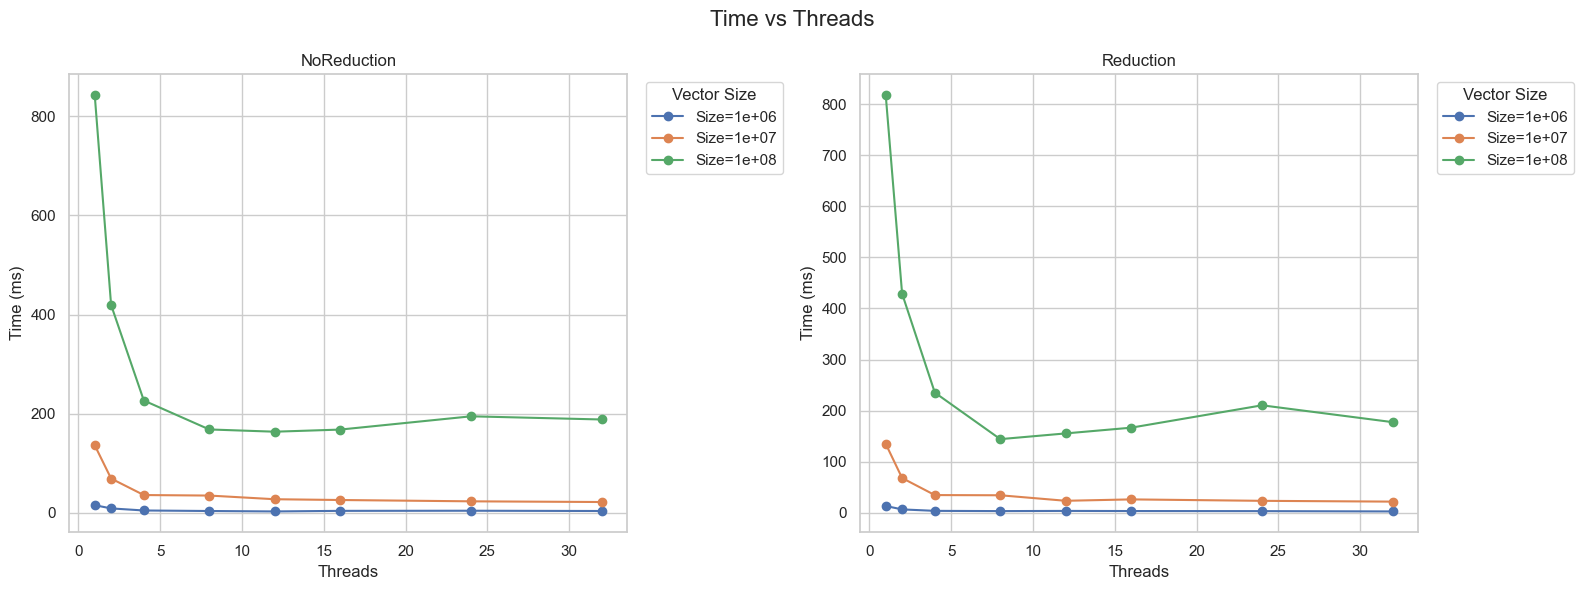

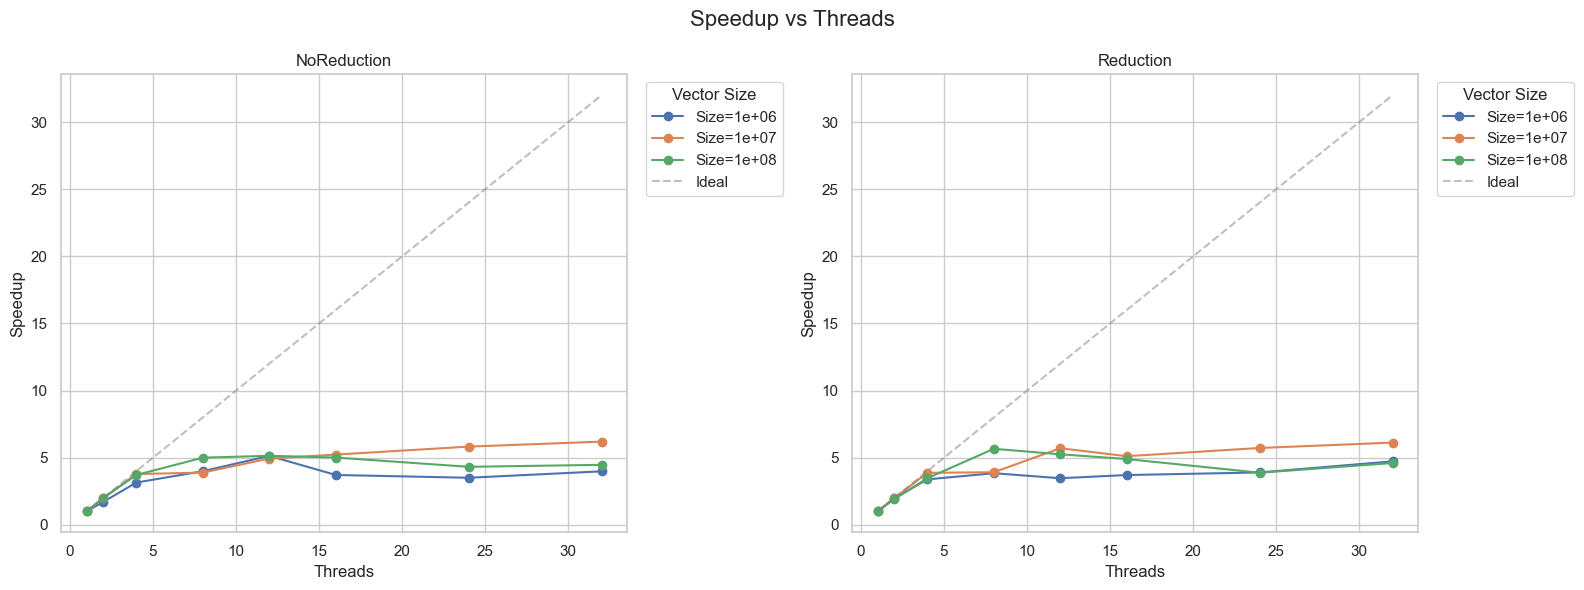

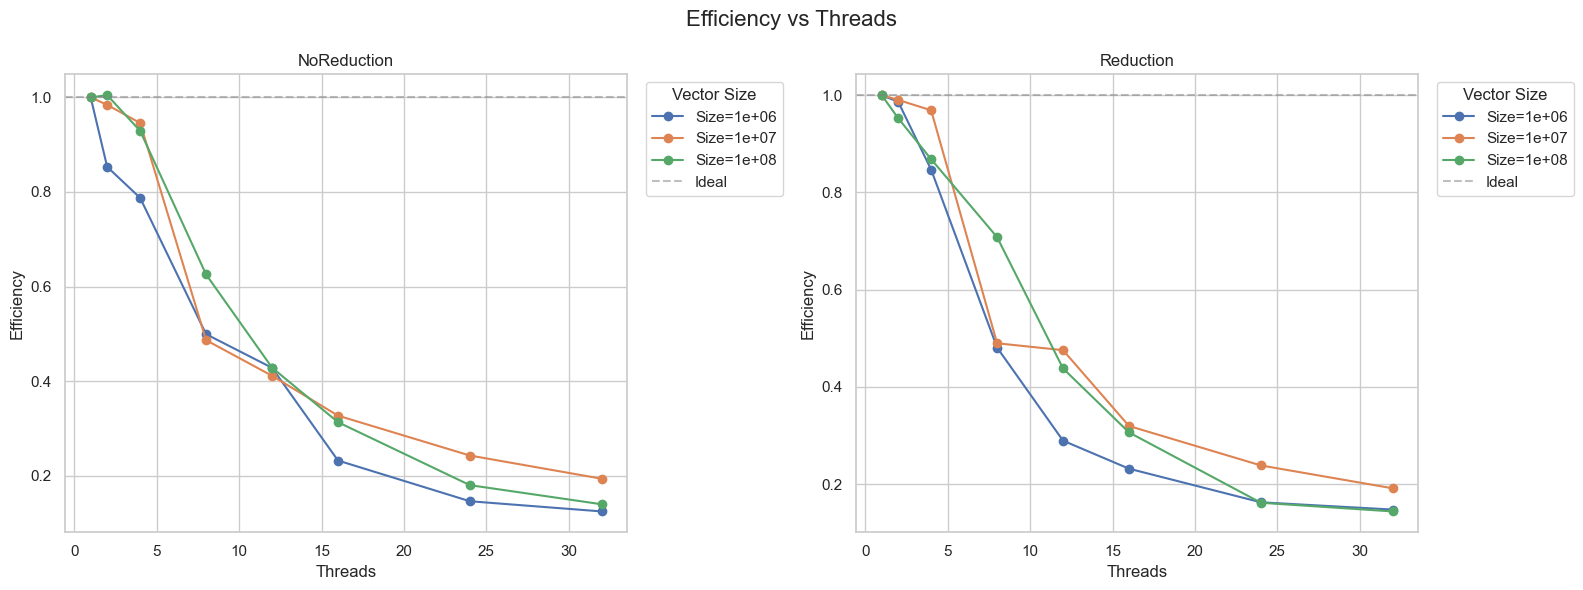

In [4]:
# --- ПОСТРОЕНИЕ ГРАФИКОВ ---
for col_name, ylabel, title in plot_configs:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    
    # Цикл по методам (axes[0] -> NoReduction, axes[1] -> Reduction)
    for ax, method in zip(axes, methods):
        subset_method = df[df['Method'] == method]
        
        for s in sizes:
            subset_size = subset_method[subset_method['Size'] == s].sort_values('Threads')
            ax.plot(subset_size['Threads'], subset_size[col_name], marker='o', label=f'Size={s:.0e}')
        
        if col_name == 'Speedup':
            max_th = df['Threads'].max()
            ax.plot([1, max_th], [1, max_th], '--', color='gray', alpha=0.5, label='Ideal')
        
        elif col_name == 'Efficiency':
            ax.axhline(1.0, linestyle='--', color='gray', alpha=0.5, label='Ideal')

        ax.set_title(f'{method}')
        ax.set_xlabel('Threads')
        ax.set_ylabel(ylabel)
        ax.grid(True)
        ax.legend(title='Vector Size', bbox_to_anchor=(1.02, 1), loc='upper left')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()